## CSV to Zarr

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import fsspec
import xarray as xr
import os
import glob
import numpy as np
import pandas as pd
from time import sleep
from functools import partial
import time
import numcodecs
import zarr
import dask
from tqdm import tqdm
from dask.distributed import as_completed
import s3fs
import gc
s3 = s3fs.S3FileSystem(anon=False)

In [2]:
# %%time
# fs = fsspec.filesystem('s3', anon=False)
# all_files = fs.glob(f's3://vhnguyen/IMOS/AUV/auv_viewer_data/csv_outputs/Ningaloo201203/*.csv')
# datasets = []
# for i, file in enumerate(all_files):
#     s3_fn = 's3://' + file
#     with fs.open(s3_fn, "rb") as f:
#         df_metadata = pd.read_csv(f, nrows=1, parse_dates=True, infer_datetime_format=True)
#     with fs.open(s3_fn, "rb") as f:
#         df_data = pd.read_csv(f, skiprows=[0,1], parse_dates=True, infer_datetime_format=True)

#     df = pd.concat([df_metadata, df_data], axis=0, ignore_index=True)
#     df.ffill(axis=0, inplace=True)
#     df = df.iloc[1:]

#     # Convert 'time' as object to datetime
#     df['time'] = pd.to_datetime(df['time'])
#     df = df.set_index(['time'])

#     # Convert to dataset, set 'time' as dims
#     ds = df.to_xarray()
#     ds['time'] = pd.to_datetime(ds['time'])

#     for var in ds_chunked.data_vars:
#         # float32 to save memory usage
#         if (ds[var].dtype == np.float64):
#             ds[var] = ds[var].astype(np.float32)
#         ds[var].encoding = {}
    
#     datasets.append(ds)

In [3]:
# def export_zarrs(store, datasets):
#     for i, dataset in enumerate(datasets):
#         if i == 0:
#             dataset.to_zarr(store,
#                         mode='w', 
#                         consolidated=True)
#         else:
#             # appending
#             dataset.to_zarr(store, 
#                             mode='a', 
#                             append_dim='time', 
#                             consolidated=True)

In [4]:
# %%time
# # export to local storage
# store = '/home/ec2-user/SageMaker/notebooks/Zarr/csv/output.zarr/'
# export_zarrs(store, datasets)

In [5]:
# %%time
# import s3fs
# s3 = s3fs.S3FileSystem(anon=False)
# store= s3fs.S3Map(root=f's3://imos-data-pixeldrill/viet-test/csv_zarrs/', s3=s3, check=False)
# export_zarrs(store, datasets)

### Open zarr

Source CSV: http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=IMOS/AUV/auv_viewer_data/csv_outputs/Ningaloo201203/

In [6]:
%%time
zarrs = xr.open_zarr('s3://vhnguyen/auv/sample_csv_zarrs/')
zarrs

CPU times: user 250 ms, sys: 33.4 ms, total: 283 ms
Wall time: 683 ms


<xarray.Dataset>
Dimensions:                                 (time: 229563)
Coordinates:
  * time                                    (time) datetime64[ns] 2012-03-03T...
Data variables: (12/43)
     geospatial_lon_max                     (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
     geospatial_lon_min                     (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
     geospatial_vertical_max                (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
     time_coverage_end                      (time) object dask.array<chunksize=(6746,), meta=np.ndarray>
    abstract                                (time) object dask.array<chunksize=(6746,), meta=np.ndarray>
    altitude_sensor                         (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
    ...                                      ...
    sea_water_temperature                   (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
    time_coverage_start                     (time) object dask.array<chunksize=(6746,), meta=np.ndarray>
    up_left_lat                             (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
    up_left_lon                             (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
    up_right_lat                            (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>
    up_right_lon                            (time) float32 dask.array<chunksize=(6746,), meta=np.ndarray>

### Plotting

CPU times: user 98.5 ms, sys: 38.9 ms, total: 137 ms
Wall time: 472 ms


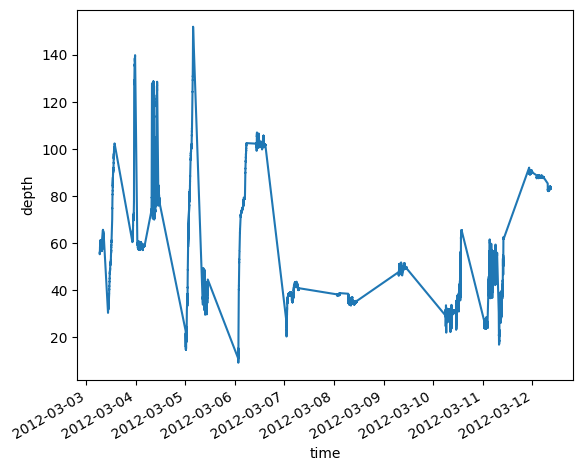

In [7]:
%%time
zarrs.depth.plot()

CPU times: user 121 ms, sys: 4.34 ms, total: 126 ms
Wall time: 450 ms


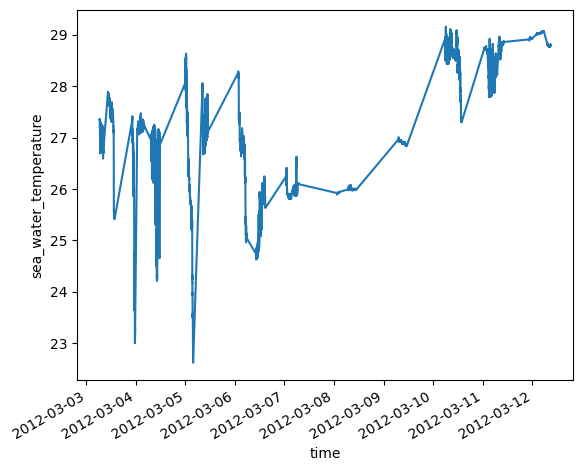

In [8]:
%%time
zarrs.sea_water_temperature.plot()

CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 444 ms


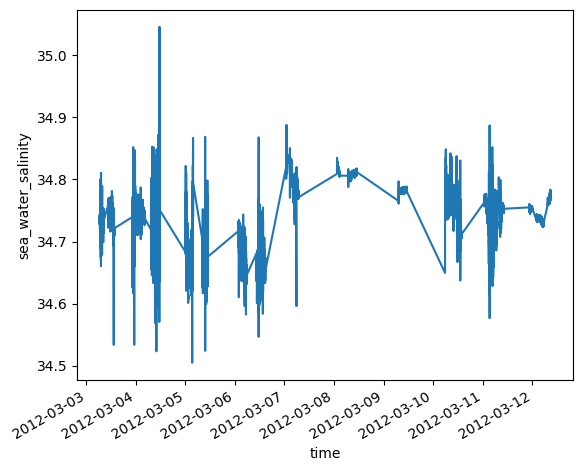

In [9]:
%%time
zarrs.sea_water_salinity.plot()